In [285]:
import pandas as pd
import numpy as np
import datetime
import seaborn as sns

In [531]:
weather = pd.read_csv('/Users/nupuragrawal/downloads/nyc_interview_dataset/2015_weather.csv', sep = ';')
weather['pickup_date'] = weather['pickup_date'].apply(lambda x: datetime.datetime.strptime(x, "%d.%m.%y").strftime("%Y-%m-%d"))
weather.head(10)


,pickup_date,avg_temp_C,Rain,Fog,Snow
0,2015-01-01,1,NaN,NaN,NaN
1,2015-01-02,4,NaN,NaN,NaN
2,2015-01-03,3,1.0,NaN,1.0
3,2015-01-04,9,1.0,NaN,NaN
4,2015-01-05,2,NaN,NaN,NaN
5,2015-01-06,-6,NaN,NaN,1.0
6,2015-01-07,-9,NaN,NaN,NaN
7,2015-01-08,-9,NaN,NaN,NaN
8,2015-01-09,-3,NaN,NaN,1.0
9,2015-01-10,-7,NaN,NaN,NaN


In [532]:
holidays = pd.read_csv('/Users/nupuragrawal/downloads/nyc_interview_dataset/holidays.csv', sep = ';')
holidays['pickup_date'] = holidays['Date'].apply(lambda x: datetime.datetime.strptime(x, "%d.%m.%y").strftime("%Y-%m-%d"))
holidays = holidays.drop(['Date'], axis = 1)
holidays.head()

,Holiday,pickup_date
0,New Years Day,2015-01-01
1,Martin Luther King Jr. Day,2015-01-19
2,Lincoln's Birthday,2015-02-12
3,Presidents' Day,2015-02-16
4,Mother's Day,2015-05-10


In [13]:
Jan = pd.read_csv('/Users/nupuragrawal/downloads/nyc_interview_dataset/2015-01_100k.csv')
Feb = pd.read_csv('/Users/nupuragrawal/downloads/nyc_interview_dataset/2015-02_100k.csv')
Mar = pd.read_csv('/Users/nupuragrawal/downloads/nyc_interview_dataset/2015-03_100k.csv')
Apr = pd.read_csv('/Users/nupuragrawal/downloads/nyc_interview_dataset/2015-04_100k.csv')
May = pd.read_csv('/Users/nupuragrawal/downloads/nyc_interview_dataset/2015-05_100k.csv')
Jun = pd.read_csv('/Users/nupuragrawal/downloads/nyc_interview_dataset/2015-06_100k.csv')
Jul = pd.read_csv('/Users/nupuragrawal/downloads/nyc_interview_dataset/2015-07_100k.csv')
Aug = pd.read_csv('/Users/nupuragrawal/downloads/nyc_interview_dataset/2015-08_100k.csv')
Sep = pd.read_csv('/Users/nupuragrawal/downloads/nyc_interview_dataset/2015-09_100k.csv')
Oct = pd.read_csv('/Users/nupuragrawal/downloads/nyc_interview_dataset/2015-10_100k.csv')
Nov = pd.read_csv('/Users/nupuragrawal/downloads/nyc_interview_dataset/2015-11_100k.csv')
Dec = pd.read_csv('/Users/nupuragrawal/downloads/nyc_interview_dataset/2015-12_100k.csv')


In [256]:
df = pd.concat([Jan, Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec], axis=0)


In [257]:
df['pickup_datetime'] = pd.to_datetime(df['pickup_datetime'])
df['pickup_date'] = [d.date() for d in df['pickup_datetime']]
df['pickup_time'] = [d.time() for d in df['pickup_datetime']]
df['dropoff_datetime'] = pd.to_datetime(df['dropoff_datetime'])
df['dropoff_date'] = [d.date() for d in df['dropoff_datetime']]
df['dropoff_time'] = [d.time() for d in df['dropoff_datetime']]
df = df.drop(['pickup_datetime', 'dropoff_datetime', 'dropoff_date'], axis=1)


In [258]:
df['trip_duration'] = (pd.to_timedelta(df['dropoff_time'].astype(str)) - pd.to_timedelta(df['pickup_time'].astype(str)))/np.timedelta64(1,'m')

In [522]:
df.columns

Index(['VendorID', 'passenger_count', 'trip_distance', 'pickup_longitude',
       'pickup_latitude', 'RateCodeID', 'store_and_fwd_flag',
       'dropoff_longitude', 'dropoff_latitude', 'payment_type', 'fare_amount',
       'extra', 'mta_tax', 'tip_amount', 'tolls_amount',
       'improvement_surcharge', 'total_amount', 'pickup_zip', 'pickup_borough',
       'pickup_neighborhood', 'dropoff_zip', 'dropoff_borough',
       'dropoff_neighborhood', 'pickup_date', 'pickup_time', 'dropoff_time',
       'trip_duration', 'tip_percent'],
      dtype='object')

### Calculating the tip percentage

In [525]:
df['tip_percent'] = ((df['tip_amount']).div((df['fare_amount']).add(df['extra']).add(df['mta_tax']).add(df['tolls_amount']).add(df['improvement_surcharge']))).mul(100)

In [528]:
df["tip_percent"]= [0 if x < 20 else 1 for x in df["tip_percent"]]

In [529]:
df['tip_percent'].value_counts()

0    834828
1    365172
Name: tip_percent, dtype: int64

In [530]:
df.head(10)

,VendorID,passenger_count,trip_distance,pickup_longitude,pickup_latitude,RateCodeID,store_and_fwd_flag,dropoff_longitude,dropoff_latitude,payment_type,...,pickup_borough,pickup_neighborhood,dropoff_zip,dropoff_borough,dropoff_neighborhood,pickup_date,pickup_time,dropoff_time,trip_duration,tip_percent
0,2,1,1.78,-73.999619,40.743599,1,N,-73.992203,40.764019,2,...,Manhattan,Chelsea and Clinton,10036,1,Chelsea and Clinton,2015-01-06,11:39:29,11:49:15,9.766667,0
1,1,1,2.10,-73.981956,40.778290,1,N,-73.962173,40.805355,1,...,Manhattan,Upper West Side,10024,1,Upper West Side,2015-01-13,09:18:29,09:23:40,5.183333,1
2,2,1,2.33,-73.991188,40.742226,1,N,-73.981613,40.768452,1,...,Manhattan,Gramercy Park and Murray Hill,10019,1,Chelsea and Clinton,2015-01-16,07:15:44,07:26:42,10.966667,0
3,1,1,2.10,-73.959297,40.763336,1,N,-73.979996,40.781071,2,...,Manhattan,Upper East Side,10023,1,Upper West Side,2015-01-23,11:56:05,12:13:20,17.250000,0
4,1,2,0.90,-73.971832,40.764751,1,N,-73.984047,40.764519,2,...,Manhattan,Upper East Side,10019,1,Chelsea and Clinton,2015-01-24,10:11:48,10:18:32,6.733333,0
5,1,1,4.00,-73.994438,40.750721,1,N,-74.013710,40.709301,2,...,Manhattan,Chelsea and Clinton,10006,1,Lower Manhattan,2015-01-13,12:14:01,12:37:14,23.216667,0
6,2,3,3.13,-73.992767,40.756748,1,N,-73.995567,40.721668,1,...,Manhattan,Chelsea and Clinton,10013,1,Greenwich Village and Soho,2015-01-27,20:27:12,20:41:40,14.466667,1
7,1,2,0.90,-73.991455,40.727707,1,N,-73.997421,40.719036,1,...,Manhattan,Greenwich Village and Soho,10013,1,Greenwich Village and Soho,2015-01-10,21:37:54,21:48:40,10.766667,1
8,2,1,1.56,-73.978531,40.729698,1,N,-74.003769,40.740360,2,...,Manhattan,Lower East Side,10014,1,Greenwich Village and Soho,2015-01-17,15:14:09,15:29:21,15.200000,0
9,2,1,1.89,-73.989326,40.743973,1,N,-73.977806,40.763203,1,...,Manhattan,Gramercy Park and Murray Hill,10019,1,Chelsea and Clinton,2015-01-14,21:57:25,22:09:12,11.783333,0


### Combining the datasets

In [533]:
df['pickup_date']= df['pickup_date'].astype(str)
weather['pickup_date']= weather['pickup_date'].astype(str)
df1 = df.merge(weather, how='left', on=['pickup_date'])
#df = pd.merge(df, holidays, how='left', on=['pickup_date'])
holidays['pickup_date']= holidays['pickup_date'].astype(str)
df1 = df1.merge(holidays, how = 'left', on = ['pickup_date'])
df1

,VendorID,passenger_count,trip_distance,pickup_longitude,pickup_latitude,RateCodeID,store_and_fwd_flag,dropoff_longitude,dropoff_latitude,payment_type,...,pickup_date,pickup_time,dropoff_time,trip_duration,tip_percent,avg_temp_C,Rain,Fog,Snow,Holiday
0,2,1,1.78,-73.999619,40.743599,1,N,-73.992203,40.764019,2,...,2015-01-06,11:39:29,11:49:15,9.766667,0,-6,NaN,NaN,1.0,NaN
1,1,1,2.10,-73.981956,40.778290,1,N,-73.962173,40.805355,1,...,2015-01-13,09:18:29,09:23:40,5.183333,1,-3,NaN,NaN,NaN,NaN
2,2,1,2.33,-73.991188,40.742226,1,N,-73.981613,40.768452,1,...,2015-01-16,07:15:44,07:26:42,10.966667,0,0,NaN,NaN,NaN,NaN
3,1,1,2.10,-73.959297,40.763336,1,N,-73.979996,40.781071,2,...,2015-01-23,11:56:05,12:13:20,17.250000,0,1,NaN,NaN,NaN,NaN
4,1,2,0.90,-73.971832,40.764751,1,N,-73.984047,40.764519,2,...,2015-01-24,10:11:48,10:18:32,6.733333,0,2,1.0,1.0,1.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1199995,2,2,1.25,-73.974289,40.779854,1,N,-73.975204,40.792549,1,...,2015-12-16,19:00:26,19:08:39,8.216667,0,10,1.0,NaN,NaN,NaN
1199996,1,1,0.70,-73.991707,40.749870,1,N,-73.980362,40.750969,2,...,2015-12-07,06:41:33,06:45:03,3.500000,0,9,NaN,NaN,NaN,NaN
1199997,1,1,1.40,-73.955223,40.773376,1,N,-73.968201,40.755070,2,...,2015-12-02,09:18:35,09:30:59,12.400000,0,11,1.0,NaN,NaN,NaN
1199998,1,1,0.60,-73.990509,40.742191,1,N,-73.979141,40.737312,2,...,2015-12-29,09:02:47,09:08:49,6.033333,0,4,1.0,NaN,NaN,NaN


In [534]:
df1 = df1.fillna(0)
df1.isnull().sum().sort_values(ascending=False)

Holiday                  0
improvement_surcharge    0
passenger_count          0
trip_distance            0
pickup_longitude         0
pickup_latitude          0
RateCodeID               0
store_and_fwd_flag       0
dropoff_longitude        0
dropoff_latitude         0
payment_type             0
fare_amount              0
extra                    0
mta_tax                  0
tip_amount               0
tolls_amount             0
total_amount             0
Snow                     0
pickup_zip               0
pickup_borough           0
pickup_neighborhood      0
dropoff_zip              0
dropoff_borough          0
dropoff_neighborhood     0
pickup_date              0
pickup_time              0
dropoff_time             0
trip_duration            0
tip_percent              0
avg_temp_C               0
Rain                     0
Fog                      0
VendorID                 0
dtype: int64

In [535]:
df1

,VendorID,passenger_count,trip_distance,pickup_longitude,pickup_latitude,RateCodeID,store_and_fwd_flag,dropoff_longitude,dropoff_latitude,payment_type,...,pickup_date,pickup_time,dropoff_time,trip_duration,tip_percent,avg_temp_C,Rain,Fog,Snow,Holiday
0,2,1,1.78,-73.999619,40.743599,1,N,-73.992203,40.764019,2,...,2015-01-06,11:39:29,11:49:15,9.766667,0,-6,0.0,0.0,1.0,0
1,1,1,2.10,-73.981956,40.778290,1,N,-73.962173,40.805355,1,...,2015-01-13,09:18:29,09:23:40,5.183333,1,-3,0.0,0.0,0.0,0
2,2,1,2.33,-73.991188,40.742226,1,N,-73.981613,40.768452,1,...,2015-01-16,07:15:44,07:26:42,10.966667,0,0,0.0,0.0,0.0,0
3,1,1,2.10,-73.959297,40.763336,1,N,-73.979996,40.781071,2,...,2015-01-23,11:56:05,12:13:20,17.250000,0,1,0.0,0.0,0.0,0
4,1,2,0.90,-73.971832,40.764751,1,N,-73.984047,40.764519,2,...,2015-01-24,10:11:48,10:18:32,6.733333,0,2,1.0,1.0,1.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1199995,2,2,1.25,-73.974289,40.779854,1,N,-73.975204,40.792549,1,...,2015-12-16,19:00:26,19:08:39,8.216667,0,10,1.0,0.0,0.0,0
1199996,1,1,0.70,-73.991707,40.749870,1,N,-73.980362,40.750969,2,...,2015-12-07,06:41:33,06:45:03,3.500000,0,9,0.0,0.0,0.0,0
1199997,1,1,1.40,-73.955223,40.773376,1,N,-73.968201,40.755070,2,...,2015-12-02,09:18:35,09:30:59,12.400000,0,11,1.0,0.0,0.0,0
1199998,1,1,0.60,-73.990509,40.742191,1,N,-73.979141,40.737312,2,...,2015-12-29,09:02:47,09:08:49,6.033333,0,4,1.0,0.0,0.0,0


### Feature Engineering

In [536]:
df1.columns

Index(['VendorID', 'passenger_count', 'trip_distance', 'pickup_longitude',
       'pickup_latitude', 'RateCodeID', 'store_and_fwd_flag',
       'dropoff_longitude', 'dropoff_latitude', 'payment_type', 'fare_amount',
       'extra', 'mta_tax', 'tip_amount', 'tolls_amount',
       'improvement_surcharge', 'total_amount', 'pickup_zip', 'pickup_borough',
       'pickup_neighborhood', 'dropoff_zip', 'dropoff_borough',
       'dropoff_neighborhood', 'pickup_date', 'pickup_time', 'dropoff_time',
       'trip_duration', 'tip_percent', 'avg_temp_C', 'Rain', 'Fog', 'Snow',
       'Holiday'],
      dtype='object')

#### VendorID

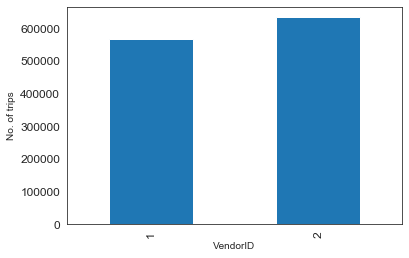

In [537]:
ax = df1.groupby(['VendorID']).size().plot(kind='bar')
ax.set_xlabel('VendorID')
ax.set_ylabel('No. of trips')
ax.tick_params(labelsize=12)

These values are well-distributed, so we don't have to treat this column.

#### payment_type

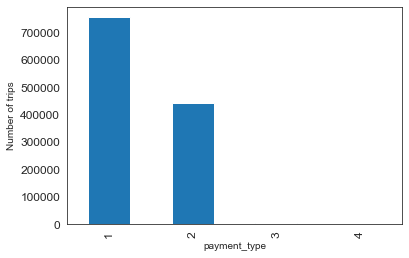

In [538]:
ax = df1.groupby(['payment_type']).size().plot(kind='bar')

ax.set_xlabel('payment_type')
ax.set_ylabel('Number of trips')
ax.tick_params(labelsize=12)

We can observe here that 1 and 2 are the taxi's main payment types, thus we can delete the rows with other payment_types.

#### store_and_fwd_flag

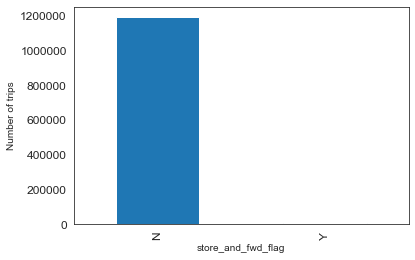

In [539]:
ax = df1.groupby(['store_and_fwd_flag']).size().plot(kind='bar')

ax.set_xlabel('store_and_fwd_flag')
ax.set_ylabel('Number of trips')
ax.tick_params(labelsize=12)

This variable does not hold a great significance since 99% of the values correspond to 'N'. We can go ahead and drop this one.

#### RateCodeID

In [540]:
df1['RateCodeID'].value_counts()

1     1198326
2        1257
5         319
3          51
4          33
99         10
6           4
Name: RateCodeID, dtype: int64

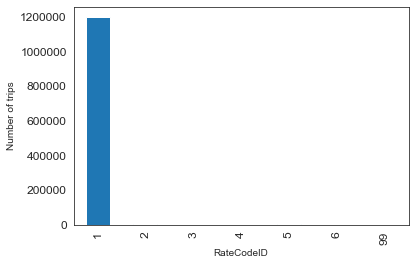

In [541]:
ax = df1.groupby(['RateCodeID']).size().plot(kind='bar')

ax.set_xlabel('RateCodeID')
ax.set_ylabel('Number of trips')
ax.tick_params(labelsize=12)

Again, 99% of the values correspond to 1, so this column does not hold a lot of significance too. We can drop this one too.

#### mta_tax

In [542]:
df1['mta_tax'].value_counts()

0.5    1199569
0.0        431
Name: mta_tax, dtype: int64

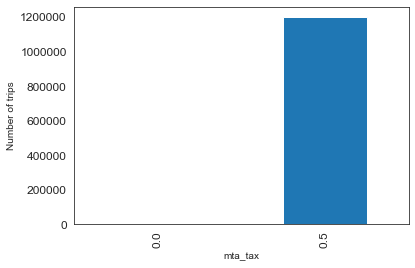

In [543]:
ax = df1.groupby(['mta_tax']).size().plot(kind='bar')

ax.set_xlabel('mta_tax')
ax.set_ylabel('Number of trips')
ax.tick_params(labelsize=12)

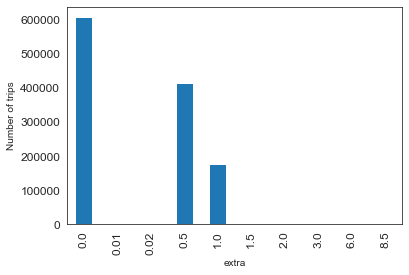

In [544]:
ax = df1.groupby(['extra']).size().plot(kind='bar')

ax.set_xlabel('extra')
ax.set_ylabel('Number of trips')
ax.tick_params(labelsize=12)

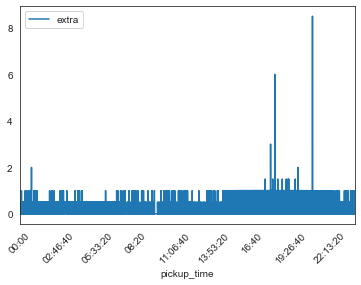

In [545]:
import matplotlib.pyplot as plt
df1.plot(x="pickup_time", y="extra")
plt.xticks(rotation=45)
plt.show()

 Currently, this only includes the 0.50 and 1. By observing the above plot we find out the charges are mostly applied for late hours and rush hours which includes the evening time.

#### improvement_surcharge

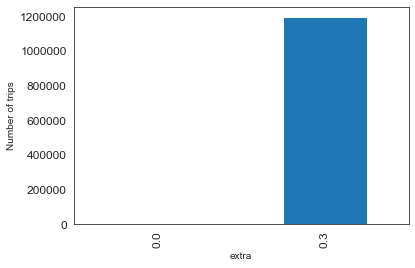

In [546]:
ax = df1.groupby(['improvement_surcharge']).size().plot(kind='bar')

ax.set_xlabel('extra')
ax.set_ylabel('Number of trips')
ax.tick_params(labelsize=12)

In [547]:
df1['improvement_surcharge'].value_counts()

0.3    1194461
0.0       5539
Name: improvement_surcharge, dtype: int64

0.30 improvement surchage occurs in almost all the trips. 
We can see that over 11M points are 0.3, 5K are 0.0.

#### tip_amount

Text(0.5, 1.0, 'payment_type=1 Tip Amount')

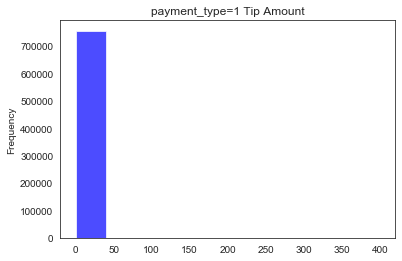

In [548]:
df1[df1['payment_type']==1].shape #(701287, 24)
df1[df1['payment_type']==1].tip_amount.plot.hist(alpha=0.7,color='b',bins=10)
plt.title('payment_type=1 Tip Amount')

Text(0.5, 1.0, 'payment_type=2 Tip Amount')

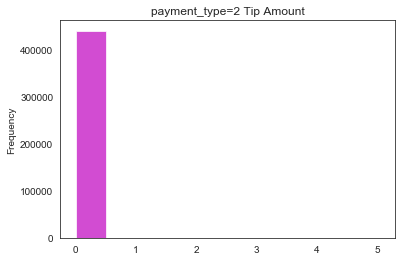

In [549]:
df1[df1['payment_type']==2].tip_amount.describe()# mean=0, n=780112
df1[df1['payment_type']==2].tip_amount.plot.hist(alpha=0.7,color='m',bins=10)
plt.title('payment_type=2 Tip Amount')

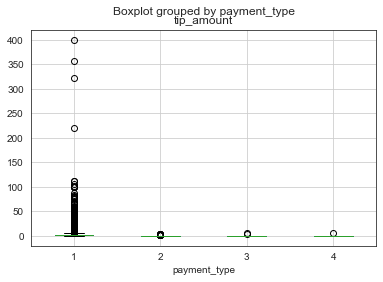

In [550]:
df1.boxplot(column='tip_amount',by='payment_type')

Thus we observe that the maximum tips are given when payments are made using payment_type 1.  This is a very important feature in predicting tips.

In [551]:
df1.describe().apply(lambda s: s.apply(lambda x: format(x, 'g')))

,VendorID,passenger_count,trip_distance,pickup_longitude,pickup_latitude,RateCodeID,dropoff_longitude,dropoff_latitude,payment_type,fare_amount,...,total_amount,pickup_zip,dropoff_zip,dropoff_borough,trip_duration,tip_percent,avg_temp_C,Rain,Fog,Snow
count,1.2e+06,1.2e+06,1.2e+06,1.2e+06,1.2e+06,1.2e+06,1.2e+06,1.2e+06,1.2e+06,1.2e+06,...,1.2e+06,1.2e+06,1.2e+06,1.2e+06,1.2e+06,1.2e+06,1.2e+06,1.2e+06,1.2e+06,1.2e+06
mean,1.52809,1.68468,12.359,-73.9781,40.7531,1.00311,-73.9757,40.753,1.37407,11.5843,...,14.4371,10091.7,10132.6,0.909002,-0.659836,0.30431,13.7806,0.259912,0.0543458,0.0673725
std,0.499211,1.33864,10771.9,0.0252664,0.0230927,0.29296,0.0271992,0.0290259,0.493683,7.65238,...,9.45474,283.218,343.452,0.287607,139.768,0.460115,10.6353,0.438586,0.226699,0.250666
min,1,0,0,-74.1141,40.577,1,-74.2386,40.5145,1,0.01,...,0.31,10001,10001,0,-1438.97,0,-12,0,0,0
25%,1,1,1,-73.9923,40.7386,1,-73.9916,40.7373,1,6.5,...,8.3,10012,10013,1,6.45,0,6,0,0,0
50%,2,1,1.7,-73.9822,40.7546,1,-73.9805,40.7548,1,9.5,...,11.76,10019,10020,1,10.65,0,15,0,0,0
75%,2,2,2.96,-73.9692,40.7684,1,-73.9651,40.7696,2,14,...,16.8,10028,10035,1,16.9167,1,23,1,0,0
max,2,7,1.18e+07,-73.7066,40.9069,99,-73.6989,40.9118,4,800,...,800.3,11692,11697,1,119.45,1,31,1,1,1


After observing the description, we see there are negative values for trip duration, or trips lasting for 119 days, which cannot be right. Continuing with the attributes,by observing the longitude and latitude for pickups and dropoffs, we can notice coordinates that don't even exist! Also most of the pickups and dropoffs occur at longitude value -73 and latitude 40.


Text(0.5, 1.0, 'coordinates')

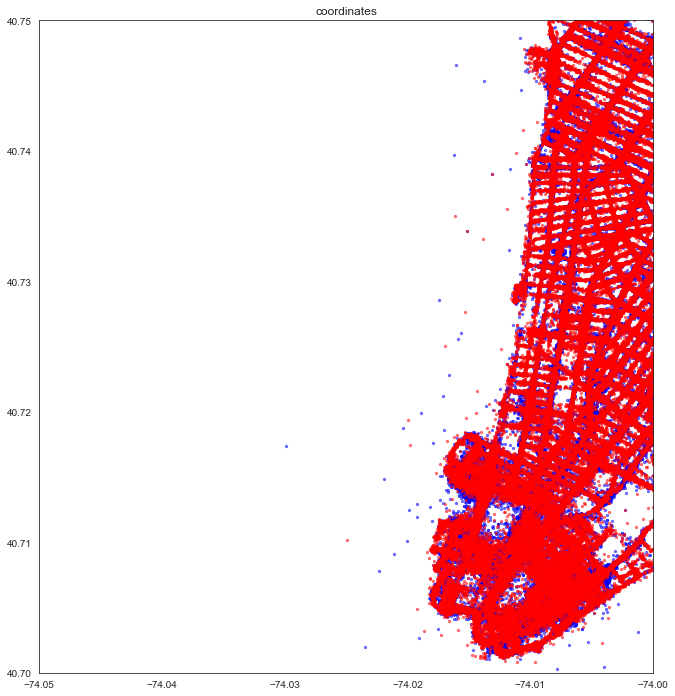

In [552]:

pickup_x = df1.pickup_longitude.values
pickup_y = df1.pickup_latitude.values
dropoff_x = df1.dropoff_longitude.values
dropoff_y = df1.dropoff_latitude.values
sns.set_style('white')

fig, ax = plt.subplots(figsize=(11, 12))

ax.scatter(pickup_x, pickup_y, s=5, color='blue', alpha=0.5)
ax.scatter(dropoff_x, dropoff_y, s=5, color='red', alpha=0.5)

ax.set_xlim([-74.05, -74.00])
ax.set_ylim([40.70, 40.75])

ax.set_title('coordinates')


In [553]:
df1.columns

Index(['VendorID', 'passenger_count', 'trip_distance', 'pickup_longitude',
       'pickup_latitude', 'RateCodeID', 'store_and_fwd_flag',
       'dropoff_longitude', 'dropoff_latitude', 'payment_type', 'fare_amount',
       'extra', 'mta_tax', 'tip_amount', 'tolls_amount',
       'improvement_surcharge', 'total_amount', 'pickup_zip', 'pickup_borough',
       'pickup_neighborhood', 'dropoff_zip', 'dropoff_borough',
       'dropoff_neighborhood', 'pickup_date', 'pickup_time', 'dropoff_time',
       'trip_duration', 'tip_percent', 'avg_temp_C', 'Rain', 'Fog', 'Snow',
       'Holiday'],
      dtype='object')

This is a bit strange, because some of these co-ordinates lie in the water.
We have to fix this coordinates in the water problem.

In [554]:
RateCodeID = (df1.RateCodeID == 1.0)
passenger_count = ((df1.passenger_count >= 1.0) & (df1.passenger_count <= 6.0))
trip_duration = ((df1.trip_duration > 0.0) & (df1.trip_duration <= 100))
trip_distance = ((df1.trip_distance > 0.0) & (df1.trip_distance <= 25.0))

pickup_latitude = ((df1.pickup_latitude >= 40.50) & (df1.pickup_latitude <= 41.00))
pickup_longitude = ((df1.pickup_longitude >= -74.02) & (df1.pickup_longitude <= -73.90))
dropoff_latitude = ((df1.dropoff_latitude >= 40.50) & (df1.dropoff_latitude <= 41.9118))
dropoff_longitude = ((df1.dropoff_longitude >= -74.02) & (df1.dropoff_longitude <= -73.60))

df1 = df1[RateCodeID & passenger_count & trip_duration & trip_distance & pickup_latitude & pickup_longitude
            & dropoff_latitude & dropoff_longitude]
df1.head(10)

,VendorID,passenger_count,trip_distance,pickup_longitude,pickup_latitude,RateCodeID,store_and_fwd_flag,dropoff_longitude,dropoff_latitude,payment_type,...,pickup_date,pickup_time,dropoff_time,trip_duration,tip_percent,avg_temp_C,Rain,Fog,Snow,Holiday
0,2,1,1.78,-73.999619,40.743599,1,N,-73.992203,40.764019,2,...,2015-01-06,11:39:29,11:49:15,9.766667,0,-6,0.0,0.0,1.0,0
1,1,1,2.10,-73.981956,40.778290,1,N,-73.962173,40.805355,1,...,2015-01-13,09:18:29,09:23:40,5.183333,1,-3,0.0,0.0,0.0,0
2,2,1,2.33,-73.991188,40.742226,1,N,-73.981613,40.768452,1,...,2015-01-16,07:15:44,07:26:42,10.966667,0,0,0.0,0.0,0.0,0
3,1,1,2.10,-73.959297,40.763336,1,N,-73.979996,40.781071,2,...,2015-01-23,11:56:05,12:13:20,17.250000,0,1,0.0,0.0,0.0,0
4,1,2,0.90,-73.971832,40.764751,1,N,-73.984047,40.764519,2,...,2015-01-24,10:11:48,10:18:32,6.733333,0,2,1.0,1.0,1.0,0
5,1,1,4.00,-73.994438,40.750721,1,N,-74.013710,40.709301,2,...,2015-01-13,12:14:01,12:37:14,23.216667,0,-3,0.0,0.0,0.0,0
6,2,3,3.13,-73.992767,40.756748,1,N,-73.995567,40.721668,1,...,2015-01-27,20:27:12,20:41:40,14.466667,1,-4,0.0,1.0,1.0,0
7,1,2,0.90,-73.991455,40.727707,1,N,-73.997421,40.719036,1,...,2015-01-10,21:37:54,21:48:40,10.766667,1,-7,0.0,0.0,0.0,0
8,2,1,1.56,-73.978531,40.729698,1,N,-74.003769,40.740360,2,...,2015-01-17,15:14:09,15:29:21,15.200000,0,-4,0.0,0.0,0.0,0
9,2,1,1.89,-73.989326,40.743973,1,N,-73.977806,40.763203,1,...,2015-01-14,21:57:25,22:09:12,11.783333,0,-4,0.0,0.0,0.0,0


In [ ]:
df1.drop(['pickup_time', 'dropoff_time'], axis=1, inplace=True)
df1.drop(['RateCodeID'], axis=1, inplace=True)

In [556]:
df1['pickup_borough'].value_counts()

Manhattan    1123301
Brooklyn       19603
Queens          8882
Bronx            598
Name: pickup_borough, dtype: int64

Thus, around 90% of the values correspond to Manhattan, so instead of label encoding we can make the dropoff-borough values which are not Manhattan 0.

In [557]:
df1['dropoff_borough'].value_counts()

1    1058064
0      94320
Name: dropoff_borough, dtype: int64

Here too, around 90% of the values correspond to Manhattan, so we can make the dropoff-borough values which are not Manhattan 0.

In [ ]:
df1['pickup_borough'] = [1 if x=='Manhattan' else 0 for x in df1['pickup_borough']]
df1['dropoff_borough'] = [1 if x=='Manhattan' else 0 for x in df1['dropoff_borough']]

In [560]:
df1['pickup_neighborhood'].value_counts()

Chelsea and Clinton              323498
Gramercy Park and Murray Hill    259420
Upper East Side                  184211
Greenwich Village and Soho       110371
Upper West Side                  101694
Lower East Side                   72869
Lower Manhattan                   50505
Northwest Brooklyn                 9941
East Harlem                        8859
Central Harlem                     8531
Northwest Queens                   8169
Greenpoint                         5527
Inwood and Washington Heights      3343
Central Brooklyn                   1391
Bushwick and Williamsburg          1316
West Queens                         705
Sunset Park                         680
Flatbush                            419
High Bridge and Morrisania          302
Hunts Point and Mott Haven          172
Borough Park                        166
Southern Brooklyn                   114
Kingsbridge and Riverdale            56
Central Bronx                        45
Bronx Park and Fordham               23


In [561]:
df1['dropoff_neighborhood'].value_counts()

Chelsea and Clinton              284492
Gramercy Park and Murray Hill    240814
Upper East Side                  176418
Upper West Side                   99293
Greenwich Village and Soho        96552
Lower East Side                   64620
Lower Manhattan                   51266
West Queens                       20114
Northwest Brooklyn                18407
Central Harlem                    16971
East Harlem                       16949
Northwest Queens                  15001
Greenpoint                        11251
Inwood and Washington Heights     10689
Central Brooklyn                   6611
Bushwick and Williamsburg          5402
Sunset Park                        2456
Flatbush                           2345
West Central Queens                1870
High Bridge and Morrisania         1484
Borough Park                       1268
Hunts Point and Mott Haven         1076
Kingsbridge and Riverdale           919
Southern Brooklyn                   845
Southeast Bronx                     709


We can use the top 10 values since they correspons to maximum entries in the dataset and perform one-hot encoding on these top 10 categories for the variable dropoff-neighbourhood.

In [ ]:
top10 = [x for x in df1['pickup_neighborhood'].value_counts().sort_values(ascending= False).head(10).index]
for label in top10:
    df1[label] = np.where(df1['pickup_neighborhood'] == label, 1, 0)
    
df1 = df1.drop(['pickup_neighborhood', 'pickup_borough'], axis=1)

In [ ]:
top10 = [x for x in df1['dropoff_neighborhood'].value_counts().sort_values(ascending= False).head(10).index]
for label in top10:
    df1[label] = np.where(df1['dropoff_neighborhood'] == label, 1, 0)
    
df1 = df1.drop(['dropoff_neighborhood', 'dropoff_borough'], axis=1)


In [565]:
df1 = df1.drop(['store_and_fwd_flag'], axis=1)

In [ ]:
df1 = df1.drop(['pickup_date', 'dropoff_date'], axis=1)

In [567]:
df1['Holiday'] = (df1['Holiday'] != 0).astype(int)

In [568]:
df1.head()

,VendorID,passenger_count,trip_distance,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,payment_type,fare_amount,extra,...,Gramercy Park and Murray Hill,Upper East Side,Greenwich Village and Soho,Upper West Side,Lower East Side,Lower Manhattan,Northwest Brooklyn,East Harlem,Central Harlem,West Queens
0,2,1,1.78,-73.999619,40.743599,-73.992203,40.764019,2,9.0,0.0,...,0,0,0,0,0,0,0,0,0,0
1,1,1,2.10,-73.981956,40.778290,-73.962173,40.805355,1,7.5,0.0,...,0,0,0,1,0,0,0,0,0,0
2,2,1,2.33,-73.991188,40.742226,-73.981613,40.768452,1,10.0,0.0,...,0,0,0,0,0,0,0,0,0,0
3,1,1,2.10,-73.959297,40.763336,-73.979996,40.781071,2,12.5,0.0,...,0,0,0,1,0,0,0,0,0,0
4,1,2,0.90,-73.971832,40.764751,-73.984047,40.764519,2,6.5,0.0,...,0,0,0,0,0,0,0,0,0,0


We can also go ahead and drop the pickup_date and dropoff_date columns now. We can drop the pickup_zip and dropoff_zip columns too as that data is covered in the neighbourhood and borough columns.

In [569]:
df1 = df1.drop(['pickup_zip', 'dropoff_zip'], axis=1)

Also, since we have to predict the tip percent, we need to drop the columns tip_amount as that has to be unknown to the model. Also, the total amount includes the tip amount, and the model can easily learn to subract the fare amount from the tip amount to predict if there was a tip or not, thus that needs to be excluded from the model too. Including these variables would have given a great test accuracy but there would have been no use of the model since we are trying to predict the tip percentage for a ride, and for that the tip amount has to be unknown to the model.

In [570]:
df1 = df1.drop(['tip_amount', 'total_amount'], axis=1)

In [574]:
df1 = df1.drop(['pickup_date'], axis=1)

In [575]:
df1.dtypes

VendorID                           int64
passenger_count                    int64
trip_distance                    float64
pickup_longitude                 float64
pickup_latitude                  float64
dropoff_longitude                float64
dropoff_latitude                 float64
payment_type                       int64
fare_amount                      float64
extra                            float64
mta_tax                          float64
tolls_amount                     float64
improvement_surcharge            float64
trip_duration                    float64
tip_percent                        int64
avg_temp_C                         int64
Rain                             float64
Fog                              float64
Snow                             float64
Holiday                            int64
Chelsea and Clinton                int64
Gramercy Park and Murray Hill      int64
Upper East Side                    int64
Greenwich Village and Soho         int64
Upper West Side 

### FEATURE SELECTION

In [596]:
X = df1.loc[:, df1.columns != 'tip_percent']
y = df1.loc[:, df1.columns == 'tip_percent']

#### Now, I will implement Recursive Feature Elimination(RFE) which is a type of wrapper feature selection method.¶

In [577]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler() 
scaled_values = scaler.fit_transform(X) 
X.loc[:,:] = scaled_values
cols = list(X.columns)
model = LogisticRegression()
#Initializing RFE model
rfe = RFE(model, 20)             
#Transforming data using RFE
fit = rfe.fit(X,y) 
X_rfe = rfe.fit_transform(X,y)
#Fitting the data to model
model.fit(X_rfe,y)              
temp = pd.Series(rfe.support_,index = cols)
selected_features_rfe = temp[temp==True].index


/Users/nupuragrawal/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/Users/nupuragrawal/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:744: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/nupuragrawal/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/prepr

In [599]:
cols = list(X.columns)
temp = pd.Series(rfe.support_,index = cols)
selected_features_rfe = temp[temp==True].index
print(selected_features_rfe)





Index(['VendorID', 'trip_distance', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'payment_type', 'fare_amount',
       'extra', 'mta_tax', 'improvement_surcharge', 'trip_duration',
       'avg_temp_C', 'Gramercy Park and Murray Hill',
       'Greenwich Village and Soho', 'Lower East Side', 'Lower Manhattan',
       'East Harlem', 'Central Harlem', 'West Queens'],
      dtype='object')


Thus, the above features were selected using RFE and are the most significant variables in predicting the tip amount.

#### Dropping variables using chi-square

In [579]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

# Feature extraction
test = SelectKBest(score_func=chi2, k=15)
fit = test.fit(X_rfe, y)

# Summarize scores
np.set_printoptions(precision=3)
print(fit.scores_)

X_chi = fit.transform(X_rfe)


[3.061e+04 1.265e+01 8.872e+01 1.165e+01 1.604e+01 1.425e+01 6.276e+04
 6.442e+00 2.414e+00 6.898e-05 3.647e-01 2.695e+00 3.576e+01 8.118e+00
 2.349e+02 1.832e+01 1.820e+01 4.046e+02 2.067e+02 1.579e+02]


In [580]:
from sklearn.model_selection import train_test_split
X = X_chi
X.shape
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.3, random_state = 0)

### LOGISTIC REGRESSION

In [581]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
print("Training set score: {:.3f}".format(logreg.score(X_train, y_train)))
print("Test set score: {:.3f}".format(logreg.score(X_test, y_test)))

/Users/nupuragrawal/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:744: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Training set score: 0.794
Test set score: 0.794


###### Confusion Matrix

In [582]:
from sklearn.metrics import confusion_matrix
y_pred = logreg.predict(X_test)
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[200910  40064]
 [ 31101  73641]]


In [583]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.87      0.83      0.85    240974
           1       0.65      0.70      0.67    104742

    accuracy                           0.79    345716
   macro avg       0.76      0.77      0.76    345716
weighted avg       0.80      0.79      0.80    345716



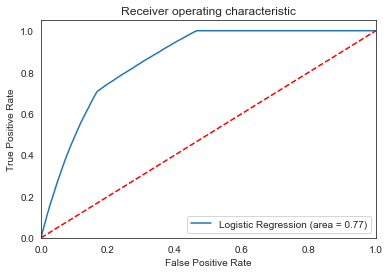

In [584]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

### DNN CLASSIFIER

In [585]:
import keras
from keras import backend as K
from keras.models import Sequential
from keras.layers import Activation
from keras.optimizers import Adam
from keras.layers.core import Dense
from keras.metrics import categorical_crossentropy
from keras.metrics import binary_crossentropy
from sklearn.metrics import confusion_matrix
from keras.layers import Dropout
from keras.layers import LeakyReLU


model= Sequential()
model.add(Dense(units=64,kernel_initializer='he_uniform', input_dim=15))
model.add(LeakyReLU(alpha=0.01))
model.add(Dropout(0.2))
model.add(Dense(units=64,kernel_initializer='he_uniform'))
model.add(LeakyReLU(alpha=0.01))
model.add(Dropout(0.2))
model.add(Dense(units=16,kernel_initializer='he_uniform'))
model.add(LeakyReLU(alpha=0.01))
model.add(Dropout(0.2))
model.add(Dense(units=1,activation='sigmoid',kernel_initializer='glorot_uniform'))


model.compile(optimizer='adam',loss='binary_crossentropy', metrics=['accuracy'])
model_history=model.fit(X_train,y_train,validation_split=0.33,batch_size=12,epochs=10)

Train on 540467 samples, validate on 266201 samples
Epoch 1/10
540467/540467 [==============================] - 267s 493us/step - loss: 0.4010 - accuracy: 0.7917 - val_loss: 0.3946 - val_accuracy: 0.7943
Epoch 2/10
540467/540467 [==============================] - 277s 512us/step - loss: 0.3962 - accuracy: 0.7935 - val_loss: 0.3929 - val_accuracy: 0.7942
Epoch 3/10
540467/540467 [==============================] - 266s 491us/step - loss: 0.3956 - accuracy: 0.7936 - val_loss: 0.3931 - val_accuracy: 0.7942
Epoch 4/10
540467/540467 [==============================] - 278s 514us/step - loss: 0.3952 - accuracy: 0.7934 - val_loss: 0.3931 - val_accuracy: 0.7933
Epoch 5/10
540467/540467 [==============================] - 267s 494us/step - loss: 0.3951 - accuracy: 0.7936 - val_loss: 0.3935 - val_accuracy: 0.7941
Epoch 6/10
540467/540467 [==============================] - 267s 494us/step - loss: 0.3950 - accuracy: 0.7936 - val_loss: 0.3930 - val_accuracy: 0.7943
Epoch 7/10
540467/540467 [==========

### Gradient Boosting

In [589]:
from sklearn.ensemble import GradientBoostingClassifier
lr_list = [0.05, 0.075, 0.1, 0.25, 0.5]

for learning_rate in lr_list:
    gb_clf = GradientBoostingClassifier(n_estimators=100, learning_rate=learning_rate, max_features=3, max_depth=2, random_state=0)
    gb_clf.fit(X_train, y_train.values.ravel())

    print("Learning rate: ", learning_rate)
    print("Accuracy score (training): {0:.3f}".format(gb_clf.score(X_train, y_train.values.ravel())))
    print("Accuracy score (test): {0:.3f}".format(gb_clf.score(X_test, y_test.values.ravel())))

Learning rate:  0.05
Accuracy score (training): 0.794
Accuracy score (test): 0.794
Learning rate:  0.075
Accuracy score (training): 0.794
Accuracy score (test): 0.794
Learning rate:  0.1
Accuracy score (training): 0.794
Accuracy score (test): 0.794
Learning rate:  0.25
Accuracy score (training): 0.794
Accuracy score (test): 0.795
Learning rate:  0.5
Accuracy score (training): 0.795
Accuracy score (test): 0.795


We're mainly interested in the classifier's accuracy on the test set, but we can see that a learning rate of 0.5 gives us the best performance on the test set and a good performance on the training set.

Now we can evaluate the classifier by checking its accuracy and creating a confusion matrix using the best learning rate we have discovered.

In [592]:
gb_clf2 = GradientBoostingClassifier(n_estimators=100, learning_rate=0.5, max_features=3, max_depth=2, random_state=0)
gb_clf2.fit(X_train,y_train.values.ravel())
predictions = gb_clf2.predict(X_test)

print("Confusion Matrix:")
print(confusion_matrix(y_test.values.ravel(), predictions))

print("Classification Report")
print(classification_report(y_test.values.ravel(), predictions))

Confusion Matrix:
[[201367  39607]
 [ 31317  73425]]
Classification Report
              precision    recall  f1-score   support

           0       0.87      0.84      0.85    240974
           1       0.65      0.70      0.67    104742

    accuracy                           0.79    345716
   macro avg       0.76      0.77      0.76    345716
weighted avg       0.80      0.79      0.80    345716



Thus, the best accuracy we got using a regular gradient classifier was 79.5% on both training and test set. Gradient boosting models are powerful algorithms but they are also prone to overfitting.

### Conclusion

All 3 methods gave almost the same test accuracy of 79.5%. The accuracy values on the test set are pretty high given that there was no data about the passenger or the driver, the initial condition of the dataset and since none of the features were highly correlated with the tip_percent variable and played a very significant role in predicting the target. We could have worked more on improving the prediction accuracy, like adding more predictors to the boosting ensemble models, increasing the depth of the trees, but that would need a lot of computational power and time. Also, exploring the hyper parameters more could have led to better results. We can add some other relevant features to the dataset like the driver's rating, passenger's demographics, days of the week which may help in improving the prediction accuracy further.